In [187]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn') # pretty matplotlib plots
plt.rcParams['figure.figsize'] = (12, 8)


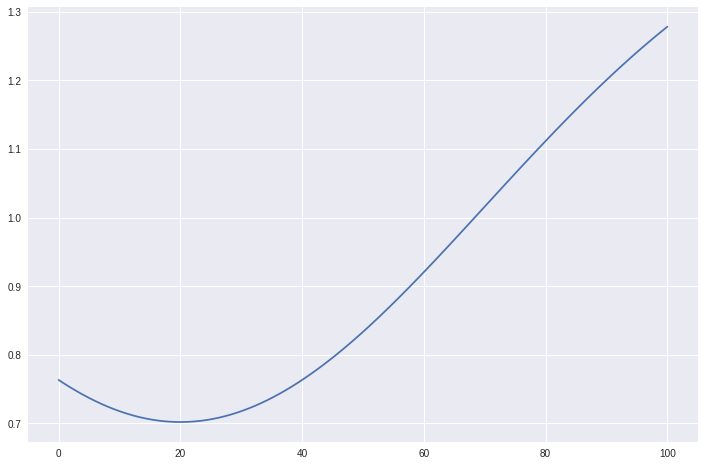

In [188]:
import scipy.stats as ss

x = np.linspace(0, 100, 100)
mu = 20
sigma = 50

y_pdf = (1-ss.norm.pdf(x, mu, sigma)*100)+.5
# my age function

plt.plot(x, y_pdf, label='pdf')


In [189]:
columns = ['Age', 'Smoker', 'Gender', 'BMI', 'Diabetic', 'Cost']
df = pd.DataFrame (columns=columns)
df

,Age,Smoker,Gender,BMI,Diabetic,Cost


In [190]:
import random
import math
def add_row(df):
    mean=9596
    age = random.randint(1, 100)
    smoker = int(random.randint(0,10)%10 < 3)
    gender = random.randint(0, 1)
    bmi = random.randint(5, 45)
    diabetic = int(random.randint(0,10)%10 < 2)
    row = []
    row.append(age)
    row.append(smoker)
    row.append(gender)
    row.append(bmi)
    row.append(diabetic)
    cost=((mean*(1-ss.norm.pdf(age, 20, 50)*100)+.5) + 
          (smoker*mean*2) + 
          (gender*mean*0.25)+ 
          (bmi*mean*.01) + 
          (diabetic * mean*.75))
    random_cost=max(np.random.normal(cost, 100), 0)
    row.append(random_cost)
    df.loc[len(df)] = row
    return df

In [191]:
for x in range(100000):
    df = add_row(df)

In [192]:
df.to_csv('patients.csv')

In [193]:
df.head(20)

,Age,Smoker,Gender,BMI,Diabetic,Cost
0,36.0,0.0,1.0,22.0,0.0,6772.386101
1,17.0,0.0,1.0,21.0,0.0,6294.036339
2,5.0,1.0,1.0,34.0,0.0,27205.152360
3,95.0,0.0,1.0,27.0,0.0,12149.983796
4,35.0,1.0,1.0,10.0,0.0,24844.010333
5,19.0,0.0,0.0,17.0,0.0,3530.935048
6,50.0,0.0,0.0,25.0,1.0,12697.444292
7,6.0,0.0,0.0,29.0,0.0,4868.313318
8,81.0,0.0,1.0,15.0,1.0,17107.811474
9,63.0,0.0,1.0,41.0,0.0,10633.237970


In [194]:
df.shape

(100000, 6)

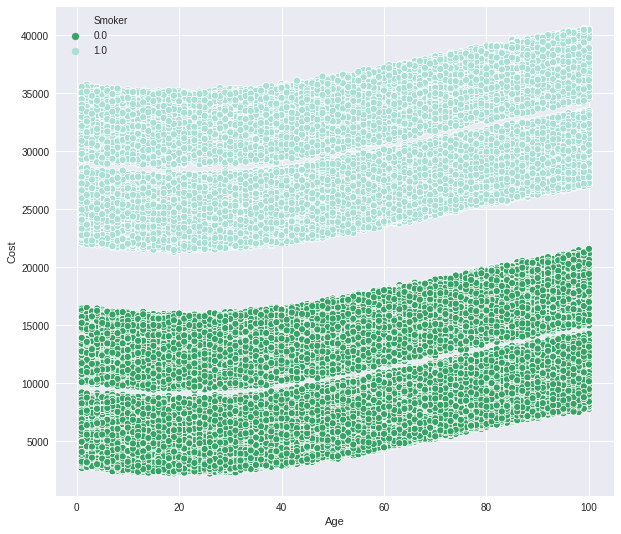

In [195]:
from matplotlib import rcParams

# figure size in inches
rcParams['figure.figsize'] = 10, 9
sns.scatterplot(x="Age", y="Cost", data=df, palette='BuGn_r', hue='Smoker')

In [196]:
def bucketize(val, size, count):
    i=0
    for i in range(count):
        if val <= (i+1)*size:
            return i
    return i

def bucketize_df(df):
    df['Age_group'] = [bucketize(x, 10, 5) for x in df['Age']]
    df['BMI_group'] = [bucketize(x, 10, 5) for x in df['BMI']]
    df.drop(['Age'], axis=1, inplace=True)
    df.drop(['BMI'], axis=1, inplace=True)
    return df

df = bucketize_df(df)


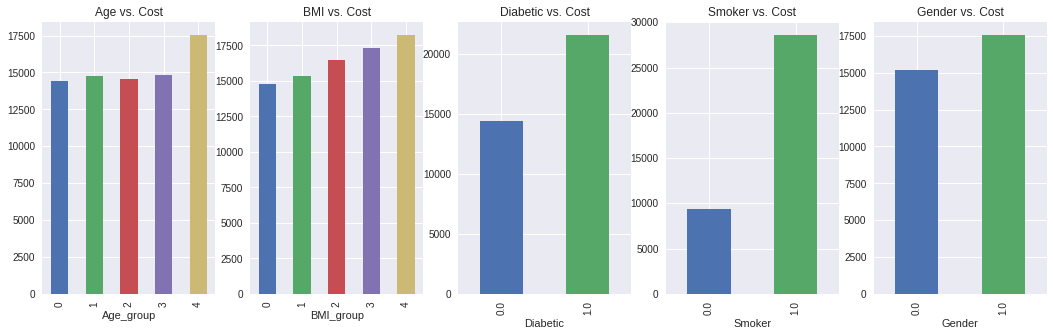

In [197]:
fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(18, 5))

df.groupby('Age_group')['Cost'].mean().plot(kind='bar', ax=axes[0], title='Age vs. Cost')
df.groupby('BMI_group')['Cost'].mean().plot(kind='bar', ax=axes[1], title='BMI vs. Cost')
df.groupby('Diabetic')['Cost'].mean().plot(kind='bar', ax=axes[2], title='Diabetic vs. Cost')
df.groupby('Smoker')['Cost'].mean().plot(kind='bar', ax=axes[3], title='Smoker vs. Cost')
df.groupby('Gender')['Cost'].mean().plot(kind='bar', ax=axes[4], title='Gender vs. Cost')

plt.show()

In [198]:
def one_hot_encode(df):
    #df = pd.concat([df,pd.get_dummies(df['region'], prefix='region')],axis=1)
    df = pd.concat([df,pd.get_dummies(df['Age_group'], prefix='Age')],axis=1)
    df = pd.concat([df,pd.get_dummies(df['BMI_group'], prefix='BMI')],axis=1)
    df.drop(['Age_group'], axis=1, inplace=True)
    df.drop(['BMI_group'], axis=1, inplace=True)
    return df

df = one_hot_encode(df)
df.head()

,Smoker,Gender,Diabetic,Cost,Age_0,Age_1,Age_2,Age_3,Age_4,BMI_0,BMI_1,BMI_2,BMI_3,BMI_4
0,0.0,1.0,0.0,6772.386101,0,0,0,1,0,0,0,1,0,0
1,0.0,1.0,0.0,6294.036339,0,1,0,0,0,0,0,1,0,0
2,1.0,1.0,0.0,27205.152360,1,0,0,0,0,0,0,0,1,0
3,0.0,1.0,0.0,12149.983796,0,0,0,0,1,0,0,1,0,0
4,1.0,1.0,0.0,24844.010333,0,0,0,1,0,1,0,0,0,0


In [199]:
from sklearn.model_selection import train_test_split
train , test = train_test_split(df, test_size = 0.3)

x_train = train.drop('Cost', axis=1)
y_train = train['Cost']

x_test = test.drop('Cost', axis = 1)
y_test = test['Cost']

In [200]:
#import required packages
from sklearn import neighbors
from sklearn.metrics import mean_squared_error 
from math import sqrt
import matplotlib.pyplot as plt
%matplotlib inline
"""
rmse_val = [] #to store rmse values for different k
for K in range(63):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)

    model.fit(x_train, y_train)  #fit the model
    pred=model.predict(x_test) #make prediction on test set
    error = sqrt(mean_squared_error(y_test,pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)"""

"\nrmse_val = [] #to store rmse values for different k\nfor K in range(63):\n    K = K+1\n    model = neighbors.KNeighborsRegressor(n_neighbors = K)\n\n    model.fit(x_train, y_train)  #fit the model\n    pred=model.predict(x_test) #make prediction on test set\n    error = sqrt(mean_squared_error(y_test,pred)) #calculate rmse\n    rmse_val.append(error) #store rmse values\n    print('RMSE value for k= ' , K , 'is:', error)"

In [201]:
#plotting the rmse values against k values
#curve = pd.DataFrame(rmse_val) #elbow curve 
#curve.plot()

In [202]:
model = neighbors.KNeighborsRegressor(n_neighbors = 25)
model.fit(x_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=25, p=2,
          weights='uniform')

In [203]:
df["Cost"].mean()

16371.411775526916

In [213]:
columns = ['Age', 'Smoker', 'Gender', 'BMI', 'Diabetic', 'Cost', 'Fraud']
df2 = pd.DataFrame (columns=columns)
df2

,Age,Smoker,Gender,BMI,Diabetic,Cost,Fraud


In [214]:
def add_fraud_row(df, fraud):
    mean=9596
    age = random.randint(1, 100)
    smoker = int(random.randint(0,10)%10 < 3)
    gender = random.randint(0, 1)
    bmi = random.randint(5, 45)
    diabetic = int(random.randint(0,10)%10 < 2)
    row = []
    row.append(age)
    row.append(smoker)
    row.append(gender)
    row.append(bmi)
    row.append(diabetic)
    cost=((mean*(1-ss.norm.pdf(age, 20, 50)*100)+.5) + 
          (smoker*mean*2) + 
          (gender*mean*0.25)+ 
          (bmi*mean*.01) + 
          (diabetic * mean*.75))
    random_cost=max(np.random.normal(cost, 100), 0)
    if(fraud == 1):
        random_cost *= 2
    row.append(random_cost)
    row.append(fraud)
    df.loc[len(df)] = row
    return df

for x in range(90):
    df2 = add_fraud_row(df2, 0)
for x in range(10):
    df2 = add_fraud_row(df2,1)
df2.head()

In [216]:
df2 = bucketize_df(df2)
df2 = one_hot_encode(df2)
df2.head()

,Smoker,Gender,Diabetic,Cost,Fraud,Age_0,Age_1,Age_2,Age_3,Age_4,BMI_0,BMI_1,BMI_2,BMI_3,BMI_4
0,0.0,0.0,1.0,18481.991635,0.0,0,0,0,0,1,0,0,0,0,1
1,0.0,1.0,0.0,8839.952454,0.0,0,0,0,0,1,0,1,0,0,0
2,0.0,1.0,0.0,12331.595751,0.0,0,0,0,0,1,0,0,1,0,0
3,0.0,0.0,0.0,3860.352087,0.0,0,0,0,0,1,1,0,0,0,0
4,0.0,1.0,0.0,11029.227141,0.0,0,0,0,0,1,0,0,0,1,0


In [217]:
preds = model.predict(df2.drop(['Cost', 'Fraud'], axis=1))

In [218]:
i = 0
errors=[]
for a in df2['Cost']:
    #print('prediction: {}, actual: {}, accuracy: {}'.format(preds[i], a, a/preds[i]))
    errors.append(a/preds[i])
    i +=1

In [219]:
import random
outliers = pd.DataFrame(errors)
#outliers.plot()

outliers = pd.DataFrame()
outliers['cust_id'] = random.sample(range(1, 1000), 100)
outliers['error'] = errors
outliers['Fraud'] = df2['Fraud']
outliers['Cost'] = df2['Cost']



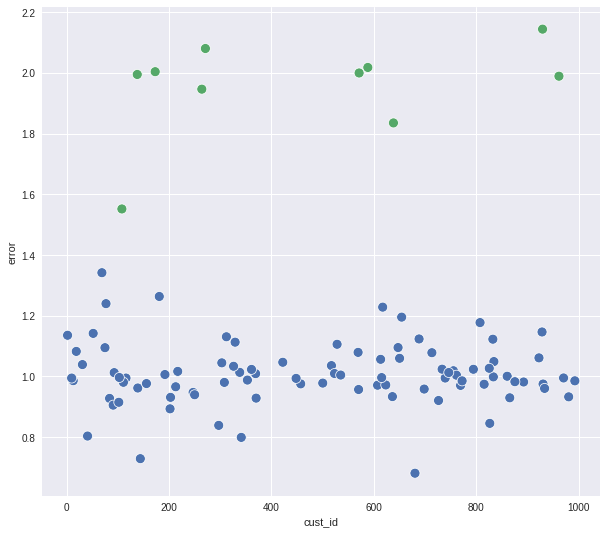

In [220]:
rcParams['figure.figsize'] = 10, 9
sns.scatterplot(x='cust_id', y='error', data=outliers, s=100, legend=False, hue='Fraud')

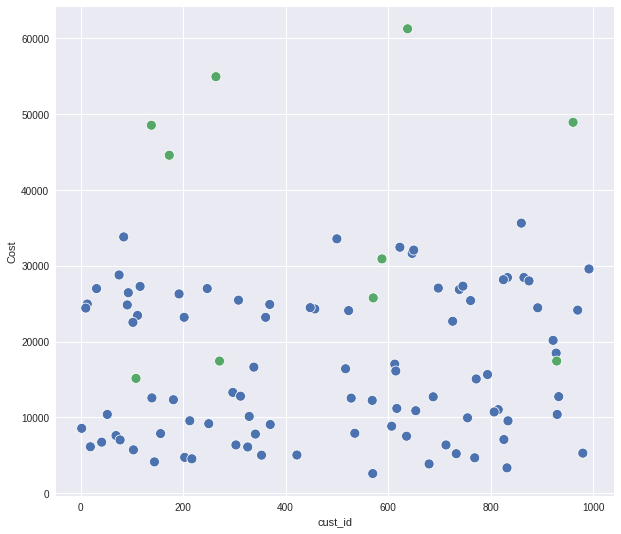

In [221]:
sns.scatterplot(x='cust_id', y='Cost', data=outliers, s=100, legend=False, hue='Fraud')
